In [5]:
## Importing the necessary librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [84]:
## Importing the dataset of Mall_Customer
df = pd.read_csv('/content/Mall_Customers.csv')

In [85]:
## Knowing about the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.shape

(200, 5)

In [87]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
## Checking if the missing values exist

df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
## CustomerID is not an important feature so dropping the column

df = df.drop('CustomerID', axis = 1)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [89]:
## Correlation Matrix
corr_matrix = df[features].corr()
print(corr_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

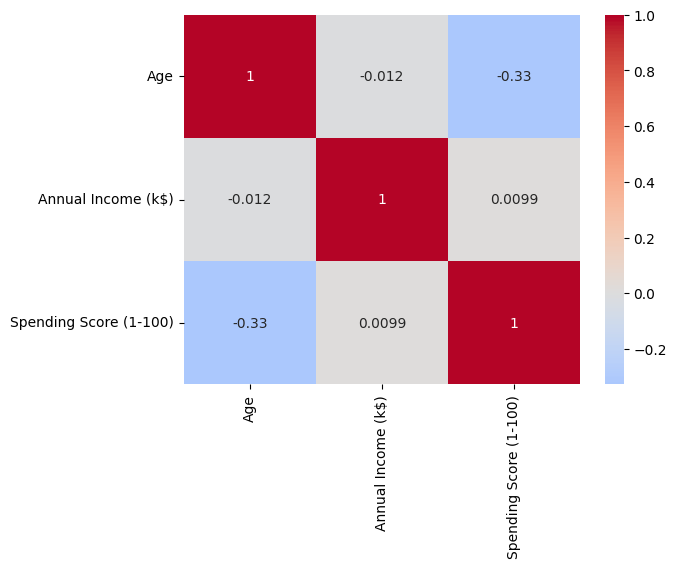

In [90]:
## Visualizing the Correlation Matrix
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', center = 0 )

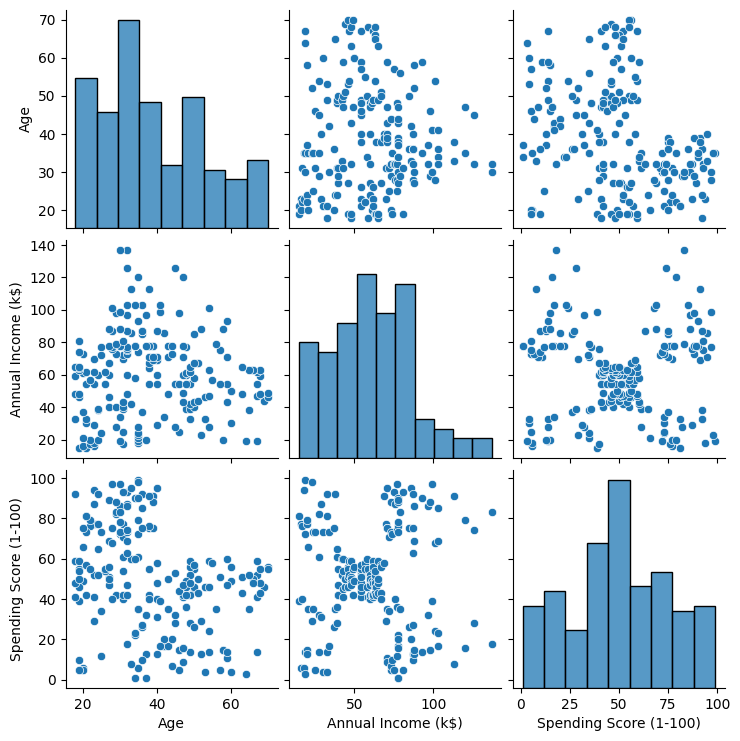

In [16]:
sns.pairplot(df[features])
plt.show()

In [17]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
## Scaling the features

X_scaled = StandardScaler().fit_transform(X)

In [19]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [20]:
## Manual Process of Elbow method to select the k value

wcss = []
for k in range(1,20):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

In [21]:
wcss

[599.9999999999999,
 389.38618895643714,
 296.0785077664937,
 205.22514747675913,
 169.30907916582007,
 133.88887021131023,
 131.0326329304239,
 104.16514962961739,
 97.00421058985384,
 93.69194379153623,
 80.46122550705903,
 70.89439767134536,
 66.59706989152865,
 63.29418394222018,
 58.80543419882623,
 57.33984006866861,
 53.64036504005854,
 50.604774688663575,
 50.427168655517804]

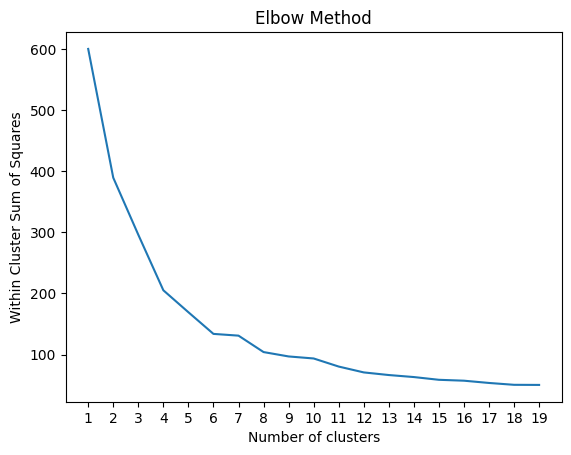

In [22]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [23]:
## Using Library to select the k value

!pip install kneed

In [24]:
from kneed import KneeLocator

k_new = KneeLocator(range(1,20), wcss, curve = 'convex', direction = 'decreasing')
k_new.elbow

np.int64(6)

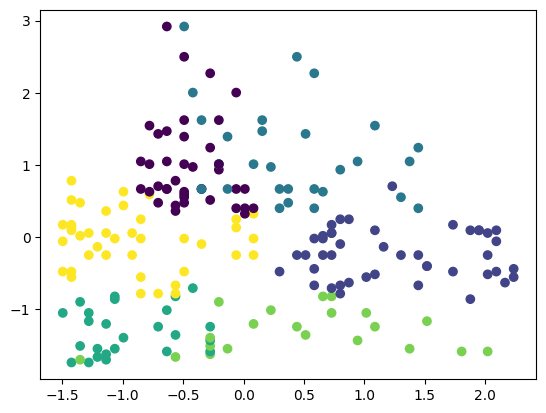

In [25]:
## K-means Clustering

kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_labels = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= y_labels)

In [26]:
# Calculating Silhouette Scores

Silhouette_coefficient1 = []
for k in range(2,20):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  score = silhouette_score(X_scaled, kmeans.fit_predict(X_scaled))
  Silhouette_coefficient1.append(score)

In [27]:
Silhouette_coefficient1

[np.float64(0.33547192894004574),
 np.float64(0.357793388710272),
 np.float64(0.4039582785148566),
 np.float64(0.35045670186058375),
 np.float64(0.43106526216603014),
 np.float64(0.40685173071203623),
 np.float64(0.3874262703277856),
 np.float64(0.4087762777469412),
 np.float64(0.4093117346102481),
 np.float64(0.36627933837816157),
 np.float64(0.38280094049326346),
 np.float64(0.3624089878815188),
 np.float64(0.3754442169701692),
 np.float64(0.3716011868974043),
 np.float64(0.3497891853818845),
 np.float64(0.3692483821966653),
 np.float64(0.31812651106886936),
 np.float64(0.3608800945878992)]

Text(0, 0.5, 'Silhouette Coefficients')

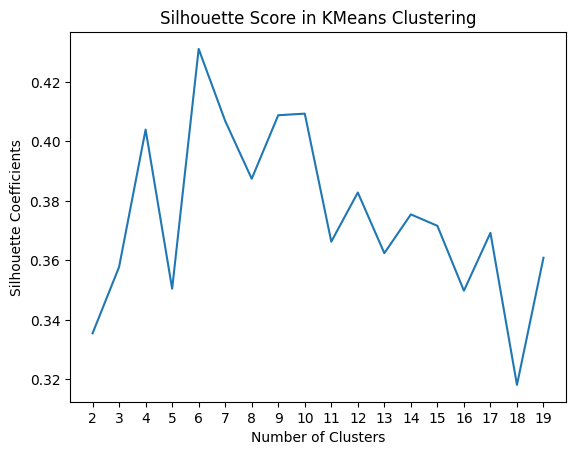

In [28]:
# Plotting the Silhouette Score
plt.plot(range(2,20), Silhouette_coefficient1)
plt.xticks(range(2,20))
plt.title('Silhouette Score in KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')

In [29]:
df['Cluster'] = y_labels
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        56.333333           54.266667               49.066667
2        44.000000           90.133333               17.933333
3        25.560000           26.480000               76.240000
4        45.523810           26.285714               19.380952
5        26.125000           59.425000               44.450000


- Cluster 0: Customers with high annual income and high spending scores, but average age.

- Cluster 1: Old Customers with average annual income and spending acores.

- Cluster 2: Younger Customers with average annual income and spending scores.

- Cluster 3: Younger customers with low annual income but high spending scores.

- CLuster 4: Customers with average age having high annual income and low spending scores.

- Cluster 5: Customers with average age having low annual income and low spending scores.

<Axes: xlabel='Cluster', ylabel='Spending Score (1-100)'>

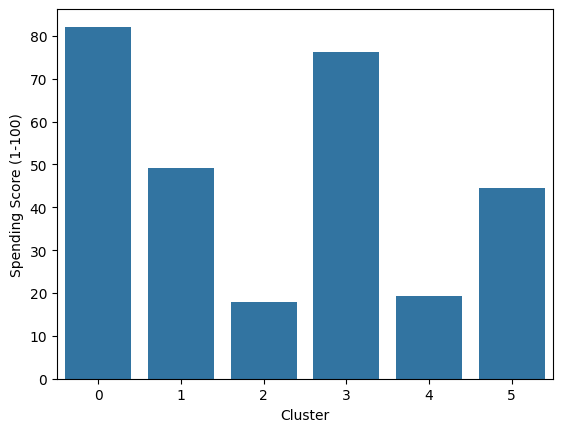

In [30]:
sns.barplot(data = cluster_summary.reset_index(), x = 'Cluster', y = 'Spending Score (1-100)')

<Axes: xlabel='Cluster', ylabel='Annual Income (k$)'>

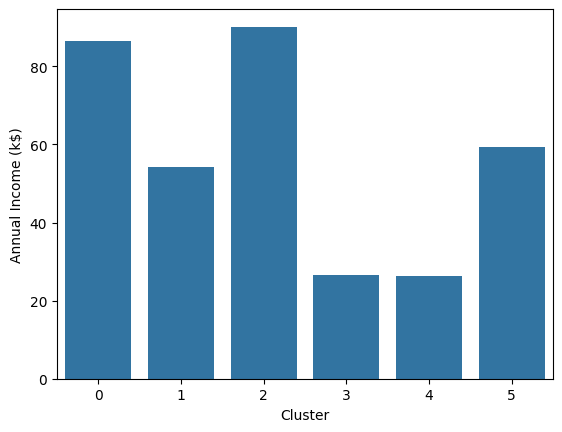

In [31]:
sns.barplot(data = cluster_summary.reset_index(), x = 'Cluster', y = 'Annual Income (k$)')

<Axes: xlabel='Cluster', ylabel='Age'>

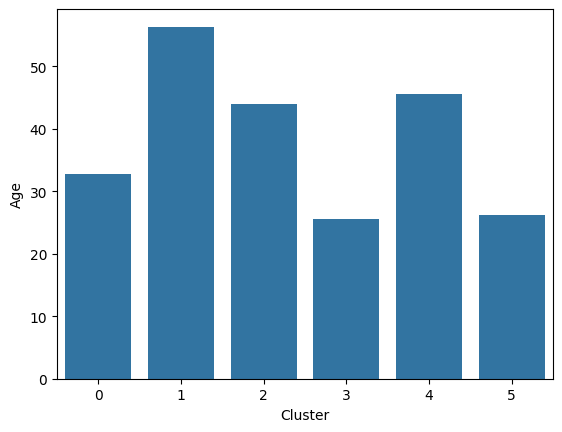

In [32]:
sns.barplot(data = cluster_summary.reset_index(), x = 'Cluster', y = 'Age')

Summary

- Cluster 0: target with premium products, loyalty programs

- Cluster 1: retention strategies

- Cluster 2: growth segment

- Cluster 3: target with offers

- Cluster 4,5: offer discounts and essentials

# Hierarchial Clustering


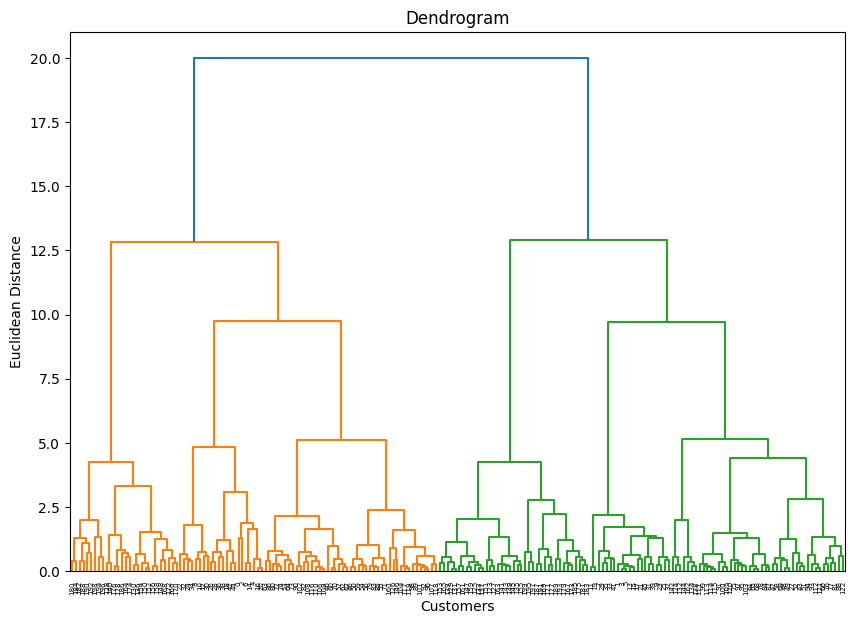

In [33]:
#Agglomerative Clustering

#Constructing a dendogram
import scipy.cluster.hierarchy as sc

#plotting the dendrogram
plt.figure(figsize= (10,7))
plt.title('Dendrogram')

sc.dendrogram(sc.linkage(X_scaled, method= 'ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
cluster = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage = 'ward')
cluster.fit(X_scaled)

AgglomerativeClustering(n_clusters=6)

In [35]:
cluster.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

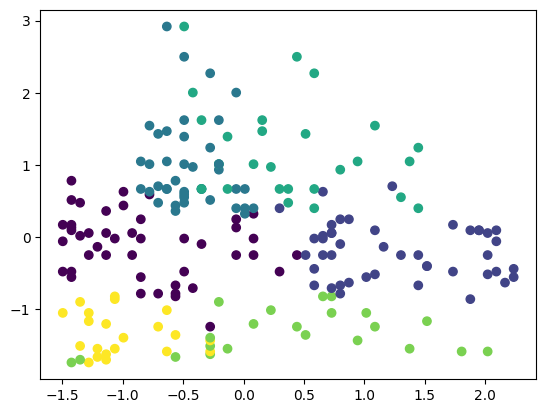

In [36]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = cluster.labels_)

In [37]:
# Calculating silhouette score

silhouette_coefficients = []
for k in range(2,20):
  agglo = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
  agglo.fit(X_scaled)
  score = silhouette_score(X_scaled, agglo.labels_)
  silhouette_coefficients.append(score)

In [38]:
silhouette_coefficients

[np.float64(0.31795733680759597),
 np.float64(0.32148866683112387),
 np.float64(0.3614512741691407),
 np.float64(0.39002826186267214),
 np.float64(0.4201169558789579),
 np.float64(0.3982948069934959),
 np.float64(0.36647935858620484),
 np.float64(0.3753854624760521),
 np.float64(0.3808885873908944),
 np.float64(0.38119813515480855),
 np.float64(0.3535716262087456),
 np.float64(0.35579016289204674),
 np.float64(0.35322985543969),
 np.float64(0.34543485589255823),
 np.float64(0.34274031436817265),
 np.float64(0.33922596294382956),
 np.float64(0.3439193827183536),
 np.float64(0.3419054931027718)]

Text(0, 0.5, 'Silhouette Coefficients')

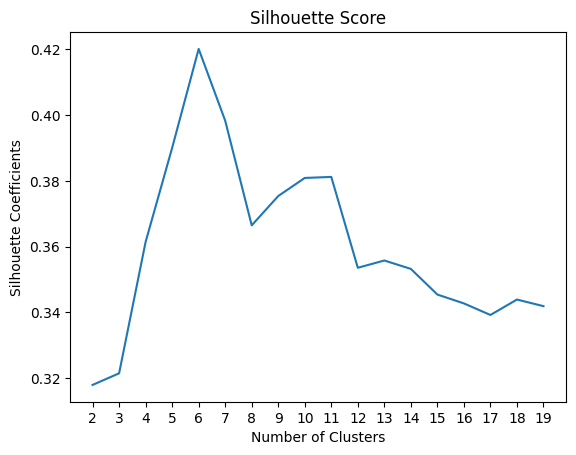

In [39]:
# Plotting the Silhouette Score
plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')

#DBSCAN Clustering

In [40]:
dbscan = DBSCAN(eps = 0.5)

In [41]:
dbscan.fit(X_scaled)

DBSCAN()

In [42]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  1,  0, -1,  0,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  3,  2,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  2,  2,  3,
        2,  2,  3, -1,  2,  2,  3,  2,  2,  2,  3,  2,  3,  2,  3,  3,  2,
        2,  3,  2,  3,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,  2,  2,  2,
        2,  3,  2, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  3,  4, -1,  4,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,
        4,  5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4, -1, -1,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

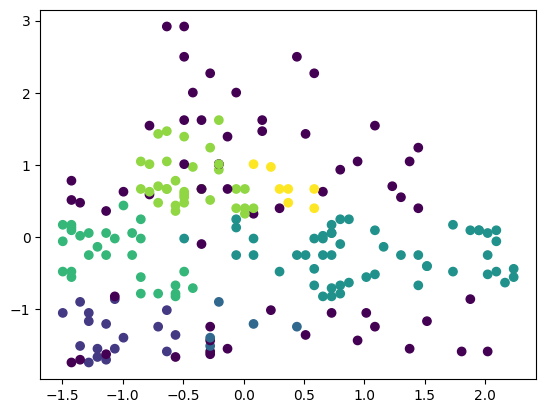

In [43]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = dbscan.labels_)

In [44]:
silhouette_coefficient2 = []
for current_eps in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]:
  dbscan = DBSCAN(eps= current_eps, min_samples = 5)
  dbscan.fit(X_scaled)
  # Check if more than one cluster is formed before calculating silhouette score
  if len(np.unique(dbscan.labels_)) > 1:
    score = silhouette_score(X_scaled, dbscan.labels_)
    silhouette_coefficient2.append(score)
  else:
    # If only one cluster or all noise points, append 0 or np.nan as silhouette score is undefined
    silhouette_coefficient2.append(0) # Appending 0 to indicate poor clustering for this eps value

In [45]:
score

np.float64(0.31312515071066704)

Text(0, 0.5, 'Silhouette Coefficients')

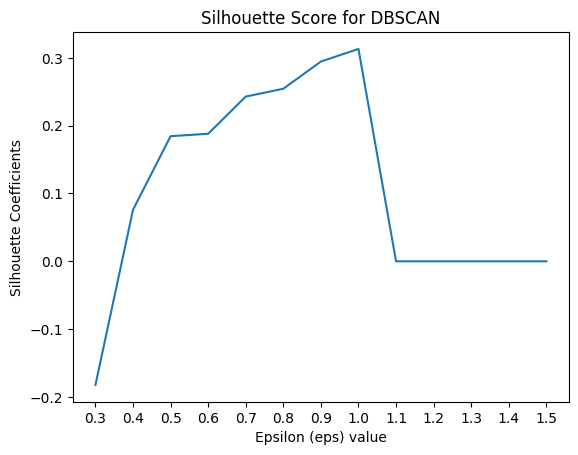

In [46]:
# Plotting the Silhouette Score
eps_values = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
plt.plot(eps_values, silhouette_coefficient2)
plt.xticks(eps_values)
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps) value')
plt.ylabel('Silhouette Coefficients')

In [47]:
silhouette_coefficient2

[np.float64(-0.18224612414077485),
 np.float64(0.07598780811524847),
 np.float64(0.18451372756506046),
 np.float64(0.18803828359177516),
 np.float64(0.24288510985732523),
 np.float64(0.2543987042290558),
 np.float64(0.29452108398423316),
 np.float64(0.31312515071066704),
 0,
 0,
 0,
 0,
 0]

# Using MinMaxScaler for feature scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
X_new_scaled = MinMaxScaler().fit_transform(X)

KMeans Clustering

In [51]:
kmeans.fit_predict(X_new_scaled)

array([11,  8, 11,  8, 11,  8,  6, 14, 12,  8, 12, 14, 12,  8,  6,  8, 11,
        8,  6, 14, 11,  8,  6,  8, 12, 14,  6, 10,  6, 14, 12,  8, 12, 14,
        6,  8,  6,  8,  6,  8,  4, 14,  0, 10,  6,  8, 18, 10, 10, 10, 18,
       10, 10, 18, 18,  0, 18,  4, 10, 18,  4,  1,  4, 18,  4,  1,  0,  4,
        1, 10,  4,  0, 18, 18, 18,  1,  0,  0,  1,  0, 18, 10,  4,  0,  1,
        0, 18,  1, 10,  0,  4,  9,  0,  0, 10,  1,  0,  1,  0,  1,  9,  0,
        4,  1,  0,  9,  4, 18,  4,  4,  4,  1,  0,  9,  1,  1,  4,  0,  0,
        0,  1,  0,  0, 16,  9,  3,  0, 16,  5,  3, 15,  3,  9,  3, 17, 16,
       15,  3, 17,  3,  5, 16,  9, 16, 17, 16,  0,  3,  7, 16, 15, 16, 15,
        3, 15, 16, 15,  3, 15,  3,  5, 16, 17, 16,  5,  3, 15, 16,  7,  3,
       15,  3, 15, 16,  5, 16,  5,  3,  5, 16,  7, 13, 15, 13,  7, 13,  5,
       13,  7, 13,  7, 13,  7, 13,  2, 13,  2, 13,  2, 13], dtype=int32)

In [76]:
# Calculating Silhouette Scores with new scaled data

Silhouette_coefficient_kmeans_new = []
for k in range(2,20):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  score = silhouette_score(X_scaled, kmeans.fit_predict(X_new_scaled))
  Silhouette_coefficient_kmeans_new.append(score)

In [77]:
Silhouette_coefficient_kmeans_new

[np.float64(0.33547192894004574),
 np.float64(0.35101716813867545),
 np.float64(0.4039582785148566),
 np.float64(0.41012227326363),
 np.float64(0.3796721980741568),
 np.float64(0.4227392170405343),
 np.float64(0.40913626972003564),
 np.float64(0.3632546230267267),
 np.float64(0.4013600229858282),
 np.float64(0.4086356001608309),
 np.float64(0.371339370010635),
 np.float64(0.36043760309347106),
 np.float64(0.36154485310387435),
 np.float64(0.37182812162890927),
 np.float64(0.32627841075361774),
 np.float64(0.36701588766433807),
 np.float64(0.31845536637868327),
 np.float64(0.27516074668913604)]

DBSCAN Clustering

In [56]:
dbscan.fit(X_new_scaled)

DBSCAN(eps=1.5)

In [78]:
# Calculating Silhouette Scores with new scaled data

silhouette_coefficient_dbscan_new = []
for current_eps in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]:
  dbscan = DBSCAN(eps= current_eps, min_samples = 5)
  dbscan.fit(X_new_scaled)
  # Check if more than one cluster is formed before calculating silhouette score
  if len(np.unique(dbscan.labels_)) > 1:
    score = silhouette_score(X_new_scaled, dbscan.labels_)
    silhouette_coefficient_dbscan_new.append(score)
  else:
    # If only one cluster or all noise points, append 0 or np.nan as silhouette score is undefined
    silhouette_coefficient_dbscan_new.append(0) # Appending 0 to indicate poor clustering for this eps value

In [81]:
silhouette_coefficient_dbscan_new

[]

Hierarchial Clustering (Agglomerative Clustering)

In [82]:
# Calculating silhouette score with new scaled data

silhouette_coefficient_hierarchial_new = []
for k in range(2,20):
  agglo = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
  agglo.fit(X_new_scaled)
  score = silhouette_score(X_new_scaled, agglo.labels_)
  silhouette_coefficient_hierarchial_new.append(score)

In [83]:
silhouette_coefficient_hierarchial_new

[np.float64(0.33752602297520423),
 np.float64(0.3409532813833087),
 np.float64(0.3652325990107206),
 np.float64(0.3955454334726547),
 np.float64(0.39826514063301693),
 np.float64(0.40553945327886154),
 np.float64(0.3927075663113482),
 np.float64(0.3973109679173157),
 np.float64(0.40084077303418636),
 np.float64(0.3975723567099882),
 np.float64(0.38510420523986527),
 np.float64(0.39258551030153327),
 np.float64(0.37212165888110094),
 np.float64(0.35405779443231056),
 np.float64(0.358310611301514),
 np.float64(0.35269584600286563),
 np.float64(0.35291893649187517),
 np.float64(0.3444927968712152)]